In [37]:
#import the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sqlite3 
%matplotlib inline

In [38]:
#importing the Dataframe  

conn = sqlite3.connect("clustering.db") 
cursor = conn.cursor() 
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
tables = cursor.fetchall() 
print(tables) 

 

[('tripadvisor_reviews',), ('supermarket_data',), ('ecommerce_behavior',), ('online_retail_customers',), ('amazon_book_reviews',)]


In [39]:
#connect to the sqlite database file  

conn =sqlite3.connect("clustering.db") 
#load the table from the database  
df=pd.read_sql("SELECT* FROM ecommerce_behavior",conn) 
#close the connection  
conn.close() 

 

In [40]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00 UTC,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01 UTC,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01 UTC,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02 UTC,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03 UTC,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


In [41]:
df.shape

(1000000, 9)

In [42]:
df['event_time'] = pd.to_datetime(df['event_time'])


In [43]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00+00:00,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01+00:00,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01+00:00,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02+00:00,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03+00:00,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


In [44]:
df.isnull().sum()

event_time            0
event_type            0
product_id            0
category_id           0
category_code     84683
brand            104952
price                 0
user_id               0
user_session          6
dtype: int64

In [45]:
df['category_code'] = df['category_code'].fillna('unknown')


In [46]:
df['brand'] = df['brand'].fillna('unknown')


In [47]:
df = df.dropna(subset=['user_session'])


In [48]:
df = df[df['price'] > 0]


In [49]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-04-01 00:00:00+00:00,view,1201465,2232732101407408685,apparel.shoes.slipons,samsung,230.38,568984877,e2456cef-2d4f-42b9-a53a-8893cb0c6851
1,2020-04-01 00:00:01+00:00,view,1307156,2053013554658804075,electronics.audio.headphone,apple,1352.67,514955500,38f43134-de83-4710-ae0a-326677d292c6
2,2020-04-01 00:00:01+00:00,view,1480477,2053013563835941749,appliances.kitchen.refrigerators,apple,1184.05,633645770,16aba270-b3c2-4b23-be0a-b7c80bc9da9e
3,2020-04-01 00:00:02+00:00,view,1307050,2053013554658804075,electronics.audio.headphone,apple,1724.34,564933778,05b443bd-e68a-4d72-b971-80bd31109cb8
4,2020-04-01 00:00:03+00:00,view,9500109,2232732104175649385,apparel.scarf,defender,25.05,530206135,e3c1fb4b-0a7e-457d-a0cf-5d1479e9aafc


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998221 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     998221 non-null  datetime64[ns, UTC]
 1   event_type     998221 non-null  object             
 2   product_id     998221 non-null  int64              
 3   category_id    998221 non-null  int64              
 4   category_code  998221 non-null  object             
 5   brand          998221 non-null  object             
 6   price          998221 non-null  float64            
 7   user_id        998221 non-null  int64              
 8   user_session   998221 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 76.2+ MB


In [51]:
df.describe()

,product_id,category_id,price,user_id
count,9.982210e+05,9.982210e+05,998221.000000,9.982210e+05
mean,3.272665e+07,2.172269e+18,312.435139,5.752263e+08
std,4.181745e+07,8.477697e+16,369.181020,4.505705e+07
min,1.000978e+06,2.053014e+18,0.770000,1.046558e+08
25%,1.307327e+06,2.053014e+18,69.470000,5.296719e+08
50%,8.800448e+06,2.232732e+18,190.200000,5.738514e+08
75%,1.000107e+08,2.232732e+18,398.720000,6.210633e+08
max,1.001858e+08,2.253831e+18,2574.070000,6.354001e+08


In [52]:


user_df = df.groupby('user_id').agg(

    # Engagement
    total_events=('event_type', 'count'),
    sessions_count=('user_session', 'nunique'),

    # Funnel behavior
    view_count=('event_type', lambda x: (x == 'view').sum()),
    cart_count=('event_type', lambda x: (x == 'cart').sum()),
    purchase_count=('event_type', lambda x: (x == 'purchase').sum()),

    # Diversity
    unique_products=('product_id', 'nunique'),
    unique_categories=('category_code', 'nunique'),
    unique_brands=('brand', 'nunique'),

    # Price behavior
    avg_price=('price', 'mean'),
    total_spent=('price', lambda x: x[df.loc[x.index, 'event_type'] == 'purchase'].sum())

).reset_index()


In [53]:
user_df['conversion_rate'] = (
    user_df['purchase_count'] / user_df['total_events']
).fillna(0)

user_df['cart_to_purchase_rate'] = (
    user_df['purchase_count'] / user_df['cart_count']
).replace([np.inf, np.nan], 0)


In [54]:
user_df.describe().T


,count,mean,std,min,25%,50%,75%,max
user_id,146386.0,5.782117e+08,4.587039e+07,1.046558e+08,5.323349e+08,5.814642e+08,6.256551e+08,6.354001e+08
total_events,146386.0,6.819102e+00,1.286397e+01,1.000000e+00,1.000000e+00,3.000000e+00,8.000000e+00,1.811000e+03
sessions_count,146386.0,1.247742e+00,8.515827e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.540000e+02
view_count,146386.0,6.259335e+00,1.231397e+01,0.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,1.811000e+03
cart_count,146386.0,4.216387e-01,1.529154e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.400000e+01
purchase_count,146386.0,1.381280e-01,5.662156e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.700000e+01
unique_products,146386.0,3.863225e+00,7.952082e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,1.715000e+03
unique_categories,146386.0,1.452687e+00,1.189199e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.200000e+01
unique_brands,146386.0,2.166888e+00,2.209051e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,8.100000e+01
avg_price,146386.0,3.342844e+02,3.757411e+02,7.700000e-01,7.995575e+01,2.049197e+02,4.267500e+02,2.574070e+03


In [55]:
from sklearn.preprocessing import StandardScaler

num_cols = user_df.columns.drop('user_id')

user_df[num_cols] = np.log1p(user_df[num_cols])
X_scaled = StandardScaler().fit_transform(user_df[num_cols])


In [56]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS / Inertia")
plt.title("Elbow Method")
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = {}

for k in range(2, 11):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores[k] = score

silhouette_scores


{2: 0.580497730367175,
 3: 0.42172994063890884,
 4: 0.3239751042807213,
 5: 0.3182626035175051,
 6: 0.27237449922977897,
 7: 0.28369053603275735,
 8: 0.27018189589921277,
 9: 0.28333409838200596,
 10: 0.27240038117010157}

In [ ]:
kmeans = KMeans(
    n_clusters=2,
    random_state=42,
    n_init=20
)

user_df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
user_df.groupby('cluster').mean().round(2)



,user_id,total_events,sessions_count,view_count,cart_count,purchase_count,unique_products,unique_categories,unique_brands,avg_price,total_spent,conversion_rate,cart_to_purchase_rate
cluster,,,,,,,,,,,,,
0,5.783226e+08,2.45,0.94,2.02,1.14,0.82,1.44,0.86,1.09,5.22,5.34,0.14,0.52
1,5.781995e+08,1.51,0.76,1.49,0.09,0.00,1.26,0.84,1.01,5.19,0.00,0.00,0.00


In [ ]:
buyers_df = user_df[user_df['purchase_count'] > 0]


In [ ]:
X_buyers = buyers_df[num_cols]
X_buyers_scaled = StandardScaler().fit_transform(np.log1p(X_buyers))

kmeans_buyers = KMeans(n_clusters=3, random_state=42, n_init=20)
buyers_df['buyer_cluster'] = kmeans_buyers.fit_predict(X_buyers_scaled)


C:\Users\Hp\AppData\Local\Temp\ipykernel_7584\3984892544.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buyers_df['buyer_cluster'] = kmeans_buyers.fit_predict(X_buyers_scaled)


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.41511568 0.29513257]


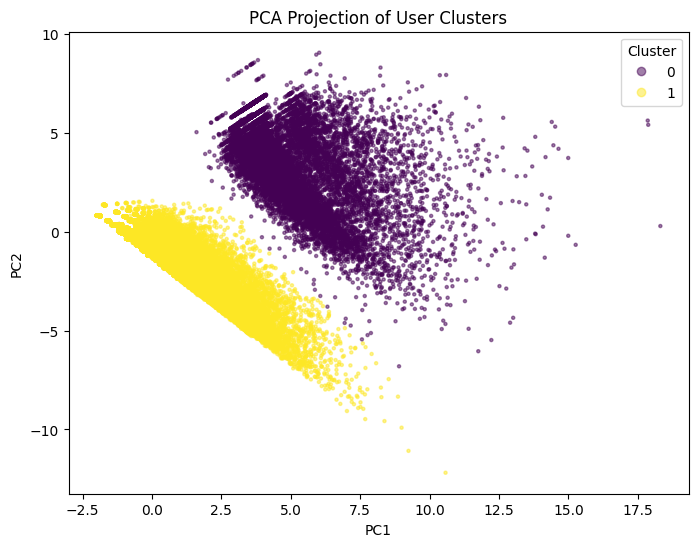

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=user_df['cluster'],
    s=5,
    alpha=0.5
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of User Clusters")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


In [ ]:
import umap

reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.1,
    n_components=2,
    random_state=42
)

X_umap = reducer.fit_transform(X_scaled)


ImportError: Numba needs NumPy 2.3 or less. Got NumPy 2.4.

In [ ]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_umap[:, 0],
    X_umap[:, 1],
    c=user_df['cluster'],
    s=5,
    alpha=0.5
)
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP Projection of User Clusters")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


NameError: name 'X_umap' is not defined

<Figure size 800x600 with 0 Axes>